<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [2]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the first dataset and check the first two observations

In [3]:
# load your data
# type your code here
df = pd.read_csv("whitewine.csv",sep = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# check data types of variables
# type your code here


### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
from scipy import stats
a = np.log(df["volatile acidity"])
a.skew()
#Log transformation is needed

0.13938315393329148

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
df["residual sugar"].skew()
v = np.log(df["residual sugar"])
v.skew()

-0.1611568975182972

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
x = df.drop(columns = "quality")
y = df["quality"]
from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:09:13   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#critic acid,chlorides,total sulfur dioxide

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
df["alcohol"].skew()
a = np.log(df["alcohol"])
a.skew()
# we are able to reduce the skewness by doing log transformation.

0.310134622964236

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


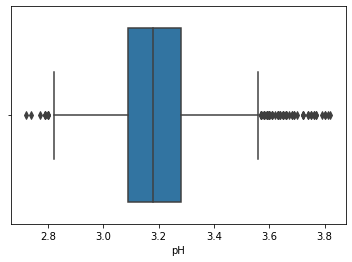

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:09:14   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.1036      0.016      6.513      0.000       0.072       0.135
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# type your code here
sns.boxplot(df["pH"])
plt.show()
df["pH"].skew()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df["pH"] = ss.fit_transform(df[["pH"]])
x = df.drop(columns = "quality")
y = df["quality"]
from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()



In [11]:
#scaling the ph value does not improving the performance of the model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
# we can vif and get the values for each column if values greater than 5 we can remove those columns to resolve multicollinearity

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
resid = linear_model.resid
resid.skew()
# residuals are already normal

0.07296691768266028

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
df["citric acid"] = np.sqrt(df["citric acid"])
df["citric acid"].skew()
x = df.drop(columns = "quality")
y = df["quality"]
from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     174.6
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:09:15   Log-Likelihood:                -5542.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  153.7758     19.001      8.093      0.000     116.526     191.026
fixed acidity            0.0618      0.021      2.956      0.003       0.021       0.103
volatile acidity        -1.8264      0.116    -15.798      0.000      -2.053      -1.600
citric acid              0.1597      0.110      1.452      0.147      -0.056       0.375
residual sugar           0.0818      0.008     10.871      0.000       0.067       0.097
chlorides               -0.3194      0.546     -0.584      0.559      -1.391       0.752
free sulfur dioxide      0.0037      0.001      4.400      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.837      0.403      -0.001       0.000
density               -151.7124     19.064     -7.958      0.000    -189.086    -114.339
pH                       0.1052      0.016      6.614      0.000       0.074       0.136
sulphates                0.6259      0.100      6.235      0.000       0.429       0.823
alcohol                  0.1902      0.024      7.845      0.000       0.143       0.238
==============================================================================
Omnibus:                      115.056   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.007
Skew:                           0.075   Prob(JB):                     6.97e-56
Kurtosis:                       4.105   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# no change even after transforming the citric acid variable

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

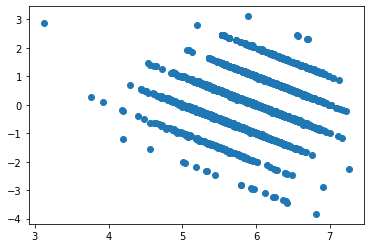

In [16]:
# type your code here
x = df.drop(columns = "quality")
y = df["quality"]
from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()
plt.scatter(y_pred,resid)

In [17]:
# Independent variabes are not dependent on the target varibale

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)
from sklearn.linear_model import LinearRegression
lr=  LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector
lr_forward = SequentialFeatureSelector(estimator=lr,n_features_to_select=5,direction="forward")
sfs = lr_forward.fit(x,y)
a = sfs.get_support()
dg = pd.DataFrame()
dg["bool"] = a
dg["columns"] = x.columns
dg["columns"]
a = dg[dg["bool"] == True]["columns"].to_frame()
for_features = list(a["columns"])
for_features

lr.fit(x_train[for_features],y_train)
y_pred_train = lr.predict(x_train[for_features])
y_pred_test  = lr.predict(x_test[for_features])
from sklearn.metrics import mean_squared_error
mse_train_for = mean_squared_error(y_pred_train,y_train)
mse_test_for = mean_squared_error(y_pred_test,y_test)
rmse_train_for = np.sqrt(mse_train_for)
rmse_test_for = np.sqrt(mse_test_for)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)




0.2508657069945014

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
from sklearn.linear_model import LinearRegression
lr=  LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector
lr_forward = SequentialFeatureSelector(estimator=lr,n_features_to_select=5,direction="backward")
sfs = lr_forward.fit(x,y)
a = sfs.get_support()
dg = pd.DataFrame()
dg["bool"] = a
dg["columns"] = x.columns
dg["columns"]
a = dg[dg["bool"] == True]["columns"].to_frame()
for_features = list(a["columns"])
for_features

lr.fit(x_train[for_features],y_train)
y_pred_train = lr.predict(x_train[for_features])
y_pred_test  = lr.predict(x_test[for_features])
from sklearn.metrics import mean_squared_error
mse_train_for = mean_squared_error(y_pred_train,y_train)
mse_test_for = mean_squared_error(y_pred_test,y_test)
rmse_train_for = np.sqrt(mse_train_for)
rmse_test_for = np.sqrt(mse_test_for)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.2508657069945014

In [20]:
# both the r squared values are the same when using forward and backward

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=100)
lr_forward=sfs(estimator=lr, k_features=(2,6), forward= True)
sfs_forward=lr_forward.fit(x,y)
features_forward=list(sfs_forward.k_feature_names_)
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
lr = LinearRegression()
lr.fit(xtrain[features_forward],ytrain)
y_pred_train= lr.predict(xtrain[features_forward])
y_pred_test = lr.predict(xtest[features_forward])
train_r2_for= r2_score(ytrain,y_pred_train)
test_r2_for= r2_score(ytest,y_pred_test)

train_mse_for= mean_squared_error(ytrain,y_pred_train)
test_mse_for= mean_squared_error(ytest,y_pred_test)
train_rmse_for= np.sqrt(train_r2_for)
test_rmse_for= np.sqrt(test_r2_for)
res_for=[train_r2_for,test_r2_for,train_rmse_for,test_rmse_for]
features_forward,res_for

(['volatile acidity',
  'residual sugar',
  'free sulfur dioxide',
  'density',
  'pH',
  'alcohol'],
 [0.28455406605983047,
  0.24863419647581853,
  0.533436093698046,
  0.49863232594349366])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=100)
lr_forward=sfs(estimator=lr, k_features='best', forward= True)
sfs_forward=lr_forward.fit(x,y)
features_forward=list(sfs_forward.k_feature_names_)
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
lr = LinearRegression()
lr.fit(xtrain[features_forward],ytrain)
y_pred_train= lr.predict(xtrain[features_forward])
y_pred_test = lr.predict(xtest[features_forward])
train_r2_for= r2_score(ytrain,y_pred_train)
test_r2_for= r2_score(ytest,y_pred_test)

train_mse_for= mean_squared_error(ytrain,y_pred_train)
test_mse_for= mean_squared_error(ytest,y_pred_test)
train_rmse_for= np.sqrt(train_r2_for)
test_rmse_for= np.sqrt(test_r2_for)
res_for=[train_r2_for,test_r2_for,train_rmse_for,test_rmse_for]
features_forward,res_for

(['volatile acidity',
  'residual sugar',
  'free sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 [0.2910200200382689,
  0.2493562723198096,
  0.5394627142243187,
  0.4993558574001206])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=100)
lr_forward=sfs(estimator=lr, k_features='best', forward= False)
sfs_forward=lr_forward.fit(x,y)
features_forward=list(sfs_forward.k_feature_names_)
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
lr = LinearRegression()
lr.fit(xtrain[features_forward],ytrain)
y_pred_train= lr.predict(xtrain[features_forward])
y_pred_test = lr.predict(xtest[features_forward])
train_r2_for= r2_score(ytrain,y_pred_train)
test_r2_for= r2_score(ytest,y_pred_test)

train_mse_for= mean_squared_error(ytrain,y_pred_train)
test_mse_for= mean_squared_error(ytest,y_pred_test)
train_rmse_for= np.sqrt(train_r2_for)
test_rmse_for= np.sqrt(test_r2_for)
res_for=[train_r2_for,test_r2_for,train_rmse_for,test_rmse_for]
features_forward,res_for

(['volatile acidity',
  'residual sugar',
  'free sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 [0.2910200200382689,
  0.2493562723198096,
  0.5394627142243187,
  0.4993558574001206])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=100)
lr_forward=sfs(estimator=lr, k_features='best', forward= False)
sfs_forward=lr_forward.fit(x,y)
features_forward=list(sfs_forward.k_feature_names_)
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
lr = LinearRegression()
lr.fit(xtrain[features_forward],ytrain)
y_pred_train= lr.predict(xtrain[features_forward])
y_pred_test = lr.predict(xtest[features_forward])
train_r2_for= r2_score(ytrain,y_pred_train)
test_r2_for= r2_score(ytest,y_pred_test)

train_mse_for= mean_squared_error(ytrain,y_pred_train)
test_mse_for= mean_squared_error(ytest,y_pred_test)
train_rmse_for= np.sqrt(train_r2_for)
test_rmse_for= np.sqrt(test_r2_for)
res_for=[train_r2_for,test_r2_for,train_rmse_for,test_rmse_for]
train_r2_for

0.2910200200382689

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)
from sklearn.linear_model import LinearRegression
lr=  LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector
lr_forward = SequentialFeatureSelector(estimator=lr,n_features_to_select=5,direction="forward")
sfs = lr_forward.fit(x,y)
a = sfs.get_support()
dg = pd.DataFrame()
dg["bool"] = a
dg["columns"] = x.columns
dg["columns"]
a = dg[dg["bool"] == True]["columns"].to_frame()
for_features = list(a["columns"])
for_features

lr.fit(x_train[for_features],y_train)
y_pred_train = lr.predict(x_train[for_features])
y_pred_test  = lr.predict(x_test[for_features])
from sklearn.metrics import mean_squared_error
mse_train_for = mean_squared_error(y_pred_train,y_train)
mse_test_for = mean_squared_error(y_pred_test,y_test)
rmse_train_for = np.sqrt(mse_train_for)
rmse_test_for = np.sqrt(mse_test_for)
print(rmse_train_for)
print(rmse_test_for)

# the model is not overfitted with the train data the model gives approximately the same result for both the train and test set




0.7581154268405418
0.7522081168924998


<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
a = pd.cut(df.pH, bins=3,
           labels=[0, 1,2])
df["Ph_encoded"] = a
x = df.drop(columns = "quality")
y = df["quality"]
from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     160.9
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:12:47   Log-Likelihood:                -5538.9
No. Observations:                4898   AIC:                         1.110e+04
Df Residuals:                    4885   BIC:                         1.119e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  156.5201     19.013      8.232      0.000     119.245     193.795
fixed acidity            0.0639      0.021      3.056      0.002       0.023       0.105
volatile acidity        -1.8195      0.116    -15.745      0.000      -2.046      -1.593
citric acid              0.1588      0.110      1.444      0.149      -0.057       0.374
residual sugar           0.0825      0.008     10.972      0.000       0.068       0.097
chlorides               -0.2611      0.547     -0.478      0.633      -1.332       0.810
free sulfur dioxide      0.0037      0.001      4.382      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.701      0.484      -0.001       0.000
density               -154.3804     19.075     -8.093      0.000    -191.776    -116.984
pH                       0.1492      0.022      6.640      0.000       0.105       0.193
sulphates                0.6175      0.100      6.153      0.000       0.421       0.814
alcohol                  0.1868      0.024      7.697      0.000       0.139       0.234
Ph_encoded              -0.1017      0.037     -2.771      0.006      -0.174      -0.030
==============================================================================
Omnibus:                      116.099   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.747
Skew:                           0.071   Prob(JB):                     6.51e-57
Kurtosis:                       4.117   Cond. No.                     3.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#no change in model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here
from sklearn.model_selection import KFold,cross_val_score
np.mean(cross_val_score(lr,x_train,y_train,cv = 10,scoring = 'r2'))

0.28042007608191977

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your code here
from sklearn.model_selection import KFold,cross_val_score
a = cross_val_score(lr,x_train,y_train,cv = 5,scoring = 'r2')
np.mean(a)

0.2794426456695615

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import LeaveOneOut
lo = LeaveOneOut()
cross_val_score(lr,x_train,y_train,cv = lo,scoring = "r2")

array([nan, nan, nan, ..., nan, nan, nan])